In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Carregamento de modelos e predições.

In [ ]:
#Arquivos csv de predições
path_end = '/content/gdrive/MyDrive/TrabalhoFinal_CleanDataset/enderecos'
#path_end = '/content/gdrive/MyDrive/619_Projeto Final'
df_pred_val = pd.read_csv(os.path.join(path_end, 'predicoes_validacao.csv'))
df_pred_test = pd.read_csv(os.path.join(path_end, 'predicoes_teste.csv'))

## Baseline

### Conjunto de validação

In [ ]:
y_pred_int = (df_pred_val['pred1_cNEmp'] > 0.5).astype(np.int32) 
y_val_int = (df_pred_val['y'] == 'N_EMPRESA').astype(np.int32) 

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(y_val_int, y_pred_int)



Acurácia balanceada: 0.8527


Matriz de confusão balanceada


Text(0.5, 57.5, 'Predicted label')

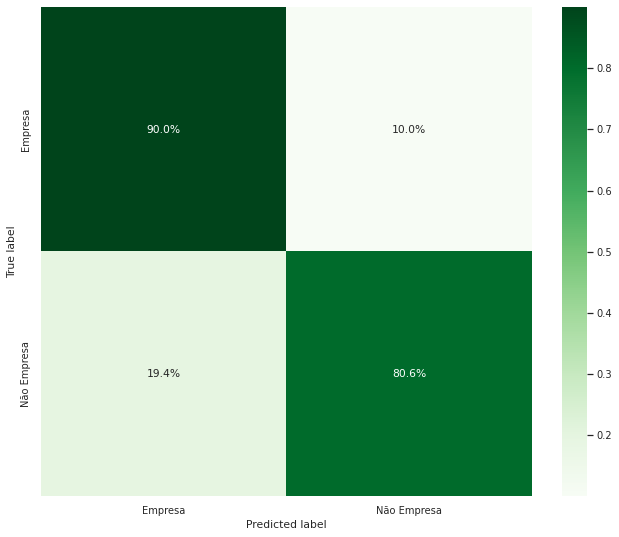

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Empresa', 'Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", round(balanced_acc,4))

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_val_int, df_pred_val['pred1_cNEmp'], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val_int, df_pred_val['pred1_cNEmp'])
print(auc_score)

0.9302371755378482


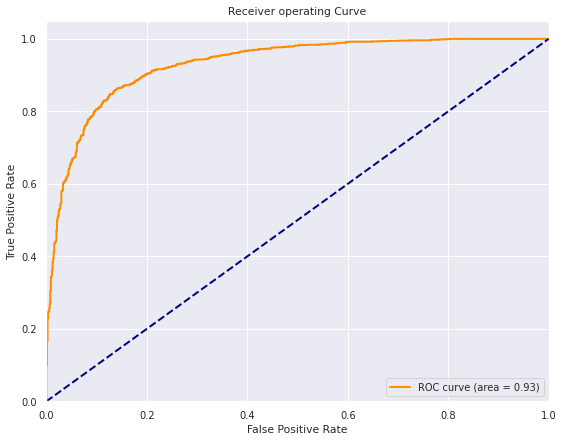

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()

### Conjunto de teste

In [ ]:
y_pred_int = (df_pred_test['pred1_cNEmp'] > 0.5).astype(np.int32) 
y_test_int = (df_pred_test['y'] == 'N_EMPRESA').astype(np.int32) 

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(y_test_int, y_pred_int)



Acurácia balanceada: 0.8362


Matriz de confusão balanceada


Text(0.5, 57.5, 'Predicted label')

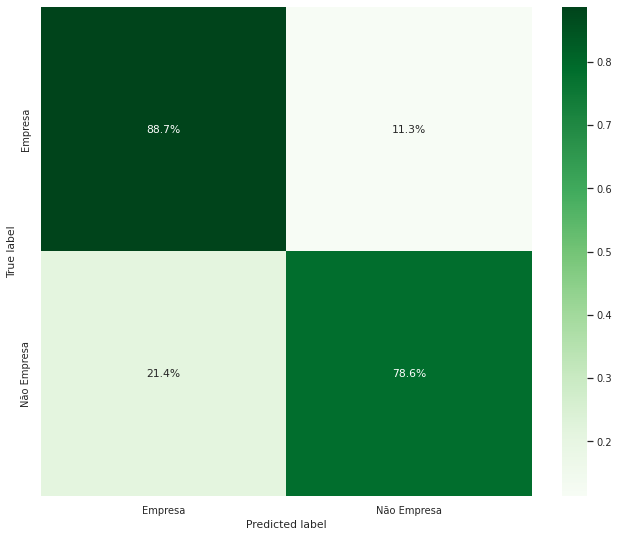

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Empresa', 'Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", round(balanced_acc,4))

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test_int, df_pred_test['pred1_cNEmp'], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test_int, df_pred_test['pred1_cNEmp'])
print(auc_score)

0.9219873779471303


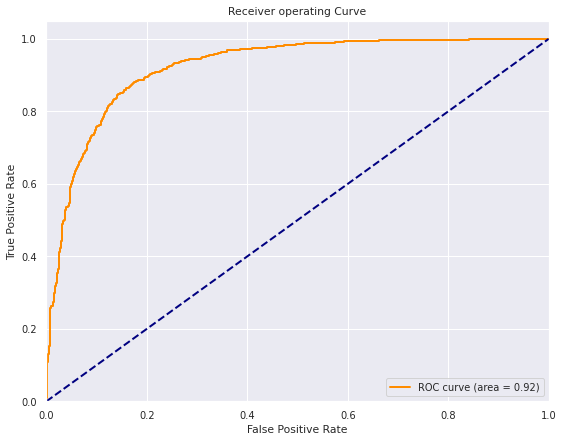

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()

## Média das probabilidades dos modelos.

### Conjunto de teste

In [ ]:
df_pred_test['mediaEmp'] = df_pred_test[['predRF_cEmp','predXGB_cEmp', 'pred1_cEmp','pred2_cEmp']].mean(axis=1)
df_pred_test['mediaNEmp'] = df_pred_test[['predRF_cNEmp','predXGB_cNEmp', 'pred1_cNEmp','pred2_cNEmp']].mean(axis=1)
df_pred_test.head()

,Unnamed: 0,Unnamed: 0.1,y,predRF_cEmp,predRF_cNEmp,predXGB_cEmp,predXGB_cNEmp,pred1_cEmp,pred1_cNEmp,pred2_cEmp,pred2_cNEmp,mediaEmp,mediaNEmp
0,0,1003,EMPRESA,1.0,0.0,0.999259,0.000741,0.999796,0.000204,0.998279,0.001721,0.999333,0.000667
1,1,1012,EMPRESA,1.0,0.0,0.999644,0.000356,0.999934,0.000066,0.987559,0.012441,0.996784,0.003216
2,2,1022,EMPRESA,1.0,0.0,0.999001,0.000999,0.999213,0.000787,0.999390,0.000610,0.999401,0.000599
3,3,1028,EMPRESA,1.0,0.0,0.995357,0.004643,0.994152,0.005848,0.985960,0.014040,0.993867,0.006133
4,4,1040,EMPRESA,1.0,0.0,0.998386,0.001614,0.282040,0.717960,0.325906,0.674094,0.651583,0.348417


In [ ]:
y_pred_int = (df_pred_test['mediaNEmp'] > 0.5).astype(np.int32) 
y_test_int = (df_pred_test['y'] == 'N_EMPRESA').astype(np.int32) 

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(y_test_int, y_pred_int)



Acurácia balanceada: 0.9247


Matriz de confusão balanceada


Text(0.5, 57.5, 'Predicted label')

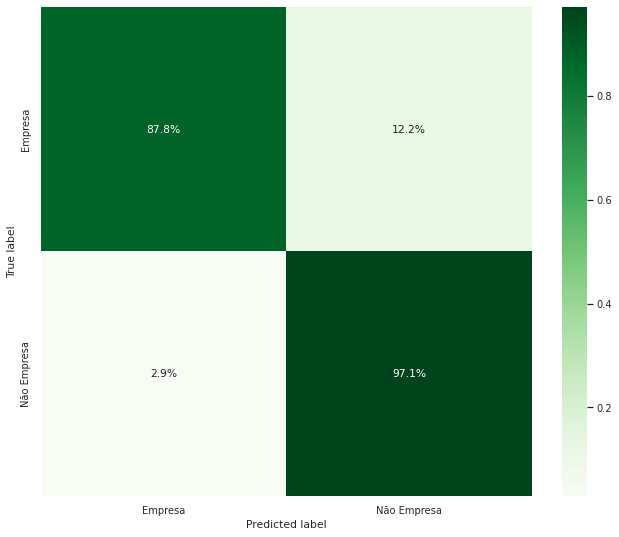

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Empresa', 'Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", round(balanced_acc,4))

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test_int, df_pred_test['mediaNEmp'], pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test_int, df_pred_test['mediaNEmp'])
print(auc_score)

0.969270744735141


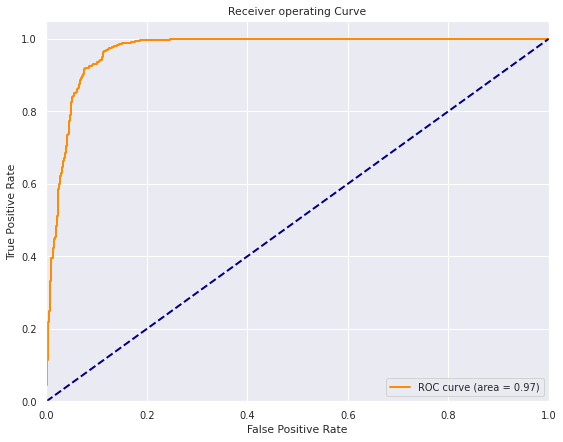

In [ ]:
plt.figure(figsize = (9,7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_score,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Curve")
plt.legend(loc="lower right")
plt.show()